In [38]:
import folium
import branca
import pandas as pd

In [39]:
df = pd.read_csv("Volcanoes.txt")

In [18]:
df.head()

,VOLCANX020,NUMBER,NAME,LOCATION,STATUS,ELEV,TYPE,TIMEFRAME,LAT,LON
0,509.0,1201-01=,Baker,US-Washington,Historical,3285.0,Stratovolcanoes,D3,48.776798,-121.810997
1,511.0,1201-02-,Glacier Peak,US-Washington,Tephrochronology,3213.0,Stratovolcano,D4,48.111801,-121.111000
2,513.0,1201-03-,Rainier,US-Washington,Dendrochronology,4392.0,Stratovolcano,D3,46.869801,-121.751000
3,515.0,1201-05-,St. Helens,US-Washington,Historical,2549.0,Stratovolcano,D1,46.199799,-122.181000
4,516.0,1201-04-,Adams,US-Washington,Tephrochronology,3742.0,Stratovolcano,D6,46.205799,-121.490997


In [54]:
%matplotlib inline

In [48]:
lat = list(df['LAT'])
lon = list(df['LON'])
volName = list(df['NAME'])
el = list(df['ELEV'])

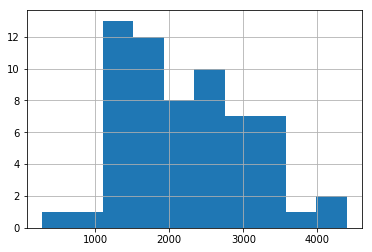

In [55]:
df['ELEV'].hist()#Checking the distribution of the elevation to determine the colorpalatte

In [71]:
def colorProducer(el):
    if el <= 1000:
        return 'green'
    elif 1000 < el <=3000:
        return 'yellow'
    else:
        return 'red'
    

In [72]:
map = folium.Map(location=[38.58, -99.09],tiles="Mapbox Bright") #Sets the initial MAP
fg = folium.FeatureGroup(name="My Map") #creates a group for feature
for i,j,k,l in zip(lat, lon, volName, el):
    fg.add_child(folium.Marker(location=[i, j], 
                               popup="Volcano:: {} and Elevation is {}".format(k,str(l)),
                               icon=folium.Icon(color=colorProducer(l))))

map.add_child(fg) #Adds the feature to the map
map.save('Map2.html') #Saves the Map